# Mathematical performance in the US, Canada and France
## by Camille de Thé

## Preliminary Wrangling

The Programme for International Student Assessment (PISA) is a worldwide study by the Organisation for Economic Co-operation and Development (OECD)  intended to evaluate educational systems by measuring 15-year-old school pupils' scholastic performance on mathematics, science, and reading. Its aim is to provide comparable data with a view to enabling countries to improve their education policies and outcomes. PISA 2012 is the programme’s 5th survey. Around 510 000 students participated in PISA 2012. They and their school principals also answered questionnaires to provide information about the students' backgrounds, schools and learning experiences and about the broader school system and learning environment.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### What is/are the main feature(s) of interest in your dataset?

I chose to focus on the relative mathematical performance of students in the US, France and Canada. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I chose to investigate the potential links between the mathematical performance of students, two attitudes toward mathematics - anxiety and self concept - and three teaching quality indicators namely cognitive activation, mathematics teacher's support, mathematics teacher's class management. In explaining potential differences in mathematical performance, i also included several variables that may support our investigation: grade, socio economic status of the family, time spent studying maths at school, orientation of the educational program (pre-vocational, vocational or general). 

To avoid having a too large dataset, i already made the selection of variables i wanted to investigate. 

In [4]:
columns_select = ['CNT','ST01Q01','ST04Q01','SCMAT','ANXMAT','ANCCLSMAN','ANCCOGACT','ANCMTSUP','PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH','MMINS','ESCS'
                ,'ISCEDO']

In [7]:
#df=pd.read_csv('pisa2012.csv',encoding='latin-1',usecols=columns_select)[columns_select]
df=pd.read_csv(r"C:\Users\camil\OneDrive\STUDIES\DS\Udacity\Exploratory_analysis_PISA_2012\data\pisa2012.csv",usecols=columns_select)[columns_select]

Let's work on our main variable of interest mathematical performance. This variable is not directly measured through a test but assessed through a statistical model based on the results obtained on several tests. As directed by the PISA technical report, let's compute the mean of the 5 plausible values of mathematical performance for each student and design it as ou main variable of interest. 

In [8]:
df.loc[:,'math_perf']= 0.2*(df['PV1MATH']+df['PV2MATH']+df['PV3MATH']+df['PV4MATH']+df['PV5MATH'])

In [9]:
#delete the individual columns of math performance'
for col in df.columns : 
    if col[:2]=='PV' : 
        df=df.drop([col],axis=1)
        
    

In [10]:
df.describe()

ST01Q01          SCMAT         ANXMAT      ANCCLSMAN  \
count  485490.000000  314607.000000  314764.000000  308467.000000   
mean        9.813323       0.035656       0.152647      -0.017825   
std         3.734726       0.955625       0.955031       1.003064   
min         7.000000      -2.180000      -2.370000      -2.822400   
25%         9.000000      -0.520000      -0.470000      -0.379800   
50%        10.000000      -0.060000       0.060000       0.050500   
75%        10.000000       0.650000       0.790000       0.484000   
max        96.000000       2.260000       2.550000       2.973400   

           ANCCOGACT       ANCMTSUP          MMINS           ESCS  \
count  308150.000000  308631.000000  283303.000000  473648.000000   
mean       -0.008190       0.029555     226.007056      -0.265546   
std         0.994403       1.018915      97.448421       1.131791   
min        -3.067400      -2.749200       0.000000      -5.950000   
25%        -0.248900      -0.367100     180.000000      -1.000000   
50%         0.173100       0.154100     220.000000      -0.190000   
75%         0.513300       0.583100     250.000000       0.610000   
max         3.460300       2.637900    3000.000000       3.690000   

           math_perf  
count  485490.000000  
mean      469.651234  
std       100.786610  
min        54.767080  
25%       396.019620  
50%       465.734520  
75%       540.123060  
max       903.107960

In [11]:
df.count().sort_values(ascending=False)

math_perf    485490
ST04Q01      485490
ST01Q01      485490
CNT          485490
ISCEDO       485438
ESCS         473648
ANXMAT       314764
SCMAT        314607
ANCMTSUP     308631
ANCCLSMAN    308467
ANCCOGACT    308150
MMINS        283303
dtype: int64

In [12]:
df=df.dropna(axis=0,how='any')
df.describe()

ST01Q01          SCMAT         ANXMAT      ANCCLSMAN  \
count  135556.000000  135556.000000  135556.000000  135556.000000   
mean        9.795162       0.024175       0.079225      -0.018420   
std         3.294919       0.978766       0.990741       1.021372   
min         7.000000      -2.180000      -2.370000      -2.822400   
25%         9.000000      -0.520000      -0.470000      -0.379800   
50%        10.000000      -0.060000       0.060000       0.050500   
75%        10.000000       0.650000       0.790000       0.484000   
max        96.000000       2.260000       2.550000       2.973400   

           ANCCOGACT       ANCMTSUP          MMINS           ESCS  \
count  135556.000000  135556.000000  135556.000000  135556.000000   
mean       -0.034318       0.005999     226.235416      -0.215758   
std         1.002351       1.032417      96.223570       1.110704   
min        -3.067400      -2.749200       0.000000      -5.950000   
25%        -0.294900      -0.436500     180.000000      -0.940000   
50%         0.140900       0.058900     220.000000      -0.140000   
75%         0.494000       0.583100     250.000000       0.640000   
max         3.460300       2.637900    3000.000000       2.780000   

           math_perf  
count  135556.000000  
mean      482.190269  
std        97.025197  
min       130.059220  
25%       410.585780  
50%       478.431220  
75%       550.171360  
max       903.107960

We will focus our investigation on three countries: Canada, US and France. 

In [13]:
list_countries = ['Canada','United States of America','France']

In [14]:
df_select = df[df.CNT.isin(list_countries)]

In [15]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9083 entries, 74470 to 480530
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CNT        9083 non-null   object 
 1   ST01Q01    9083 non-null   int64  
 2   ST04Q01    9083 non-null   object 
 3   SCMAT      9083 non-null   float64
 4   ANXMAT     9083 non-null   float64
 5   ANCCLSMAN  9083 non-null   float64
 6   ANCCOGACT  9083 non-null   float64
 7   ANCMTSUP   9083 non-null   float64
 8   MMINS      9083 non-null   float64
 9   ESCS       9083 non-null   float64
 10  ISCEDO     9083 non-null   object 
 11  math_perf  9083 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 922.5+ KB


### What is the structure of your dataset?

The dataset now consists in 8995 observations organized at the student level. Each row describes the learning context and outcomes of one student. The original dataset had 635 columns, our dataset has now only 14 columns. 



## Univariate Exploration


### Country

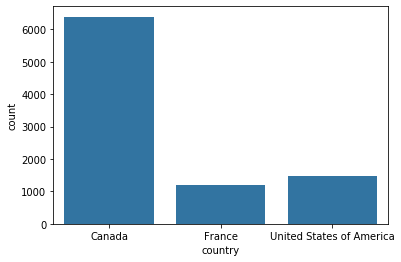

In [16]:
df_select=df_select.rename(columns={'CNT':'country'})
color_base=sb.color_palette()[0]
sb.countplot(data=df_select,x='country',color=color_base);

We have at least 1000 observations by country with most observations coming from Canada. 

### Grade variable

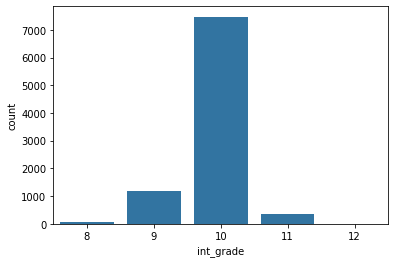

In [17]:
df_select=df_select.rename(columns={'ST01Q01':'int_grade'})
sb.countplot(data=df_select,x='int_grade',color=color_base);


There is a clear concentration of students in the 10th grade with some students also in the 9th, 11th and 8th. 

### Socio economic status of the family

The variable ESCS catpures the socio economic status of the family. It is built with 3 types of variables: the possessions of the family, the occupational status of the parents and their educational background

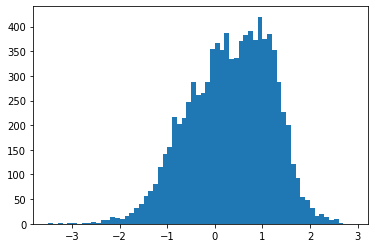

In [14]:
bin_egdes=np.arange(-3.5,3,0.1)
plt.hist(data=df_select,x='ESCS',color=color_base,bins=bin_egdes);

The above histogram shows a left-skewed normal distribution of the variable. The mode is around 1. The mean and the median around -0.15. Let's transform the variable, add a constant and take its square.    

In [18]:
df_select['socio_eco']=(df_select.ESCS+df_select.ESCS.min()+10)**2

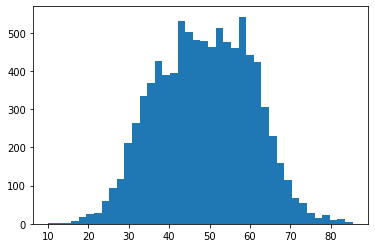

In [19]:
plt.hist(data=df_select,x='socio_eco',color=color_base,bins=40);
df_select=df_select.drop(['ESCS'],axis=1)

With the transformation, the new variable is no longer skewed.

### Main objectives of the educational programs

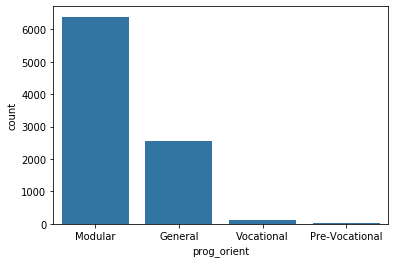

In [20]:
df_select=df_select.rename(columns={'ISCEDO':'prog_orient'})
sb.countplot(data=df_select,x='prog_orient',color=color_base);


Most of students at age 15 in these three countries are found to follow a modular programs: programs that incorporate both pre-vocationnal and general elements in their curriculum. 

### Time spent studying math in class. 

(0, 900)

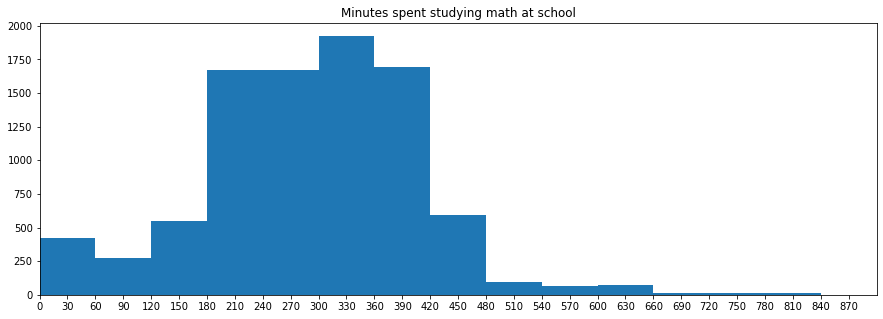

In [18]:
plt.figure(figsize=[15,5])
bin_edges=np.arange(0,1000,60)
plt.hist(data=df_select,x='MMINS',bins=bin_edges)
plt.title('Minutes spent studying math at school')
plt.xticks(np.arange(0,900,30))
plt.xlim(0,900)

First let's observe that the distribution is very large : observations span from zero to 900 minutes. It is probrably a consequence of the different natures of educational programs: some purely vocational with no time dedicated to mathematics teaching, others general with several hours per week spent of the teaching of mathematics. But Most of the observations lie between 3 and 7 hours per week. 


For ease of reading, let's convert the variable into hours. 

In [22]:
df_select['math_study_hr'] = df_select['MMINS']/60
df_select=df_select.drop(['MMINS'],axis=1)

([<matplotlib.axis.XTick at 0x264b02a8700>,
 <a list of 22 Text xticklabel objects>)

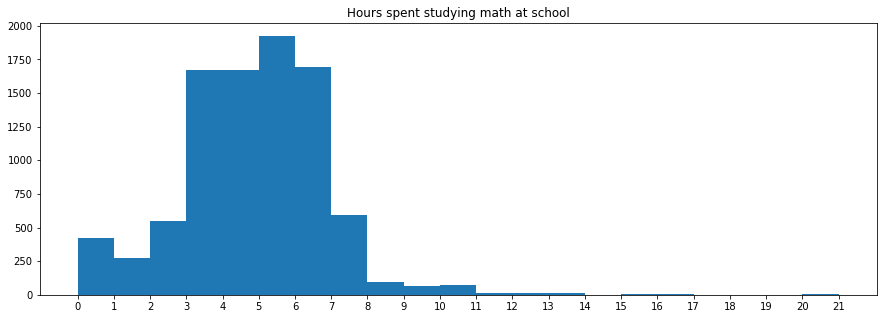

In [23]:
plt.figure(figsize=[15,5])
bin_edges=np.arange(0,df_select.math_study_hr.max()+0.1,1)
plt.hist(data=df_select,x='math_study_hr',bins=bin_edges)
plt.title('Hours spent studying math at school')
plt.xticks(np.arange(0,22,1))

### Subjective variables linked to the appreciation of mathematics and the teachers

In [21]:
df_select=df_select.rename(columns={'ANXMAT':'anxiety', 'ANCCLSMAN':'teacher_cl_mn', 'ANCCOGACT':'cog_act','ANCMTSUP':'teacher_sup','SCMAT':'self_conc'})

In [22]:
df_select.describe()

int_grade    self_conc      anxiety  teacher_cl_mn      cog_act  \
count  9083.000000  9083.000000  9083.000000    9083.000000  9083.000000   
mean      9.901464     0.205831    -0.067433       0.159692     0.213493   
std       0.432241     1.085346     1.104379       0.977299     0.952599   
min       8.000000    -2.180000    -2.370000      -2.822400    -3.067400   
25%      10.000000    -0.520000    -0.730000      -0.237000    -0.021900   
50%      10.000000     0.180000     0.060000       0.229900     0.340800   
75%      10.000000     0.880000     0.560000       0.669000     0.631400   
max      12.000000     2.260000     2.550000       2.973400     3.460300   

       teacher_sup    math_perf    socio_eco  math_study_hr  
count  9083.000000  9083.000000  9083.000000    9083.000000  
mean      0.180321   510.191855    48.677894       4.727071  
std       0.978995    84.212467    11.724308       1.981170  
min      -2.749200   226.522840    10.112400       0.000000  
25%      -0.168700   449.610520    39.942400       3.750000  
50%       0.154100   510.445560    48.860100       4.750000  
75%       0.827000   569.878490    57.608100       6.250000  
max       2.637900   784.865280    85.377600      21.333333

In [23]:
#create list of variables
math_attitudes = ['anxiety', 'self_conc']
teaching_qual = ['teacher_cl_mn', 'cog_act','teacher_sup']
attitudes = math_attitudes + teaching_qual

Let's start investigating the distributions of the two attitudes toward mathematics: anxiety and self-concept. The mathematics self-concept of students reflext their own beliefs in their mathematics abilities.

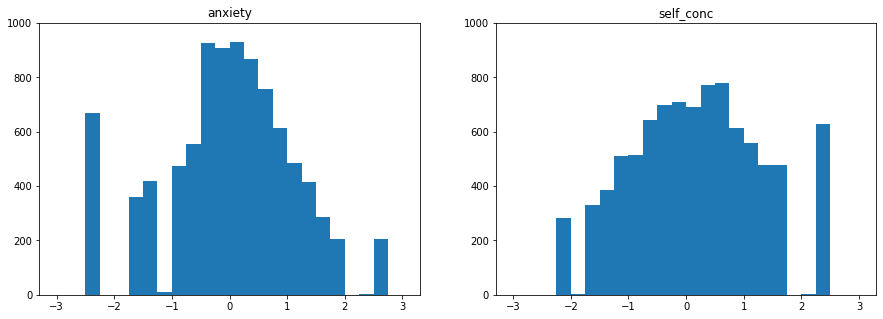

In [24]:
plt.figure(figsize=[15,5])
#plt.hist(data=df_select,x=list_attitudes[0],bins=20);
bin_edges=np.arange(-3,3.1,0.25)
for i in range(1,3,1) :
    plt.subplot(1,2,i)
    plt.hist(data=df_select,x=math_attitudes[i-1],bins=bin_edges)
    plt.title(math_attitudes[i-1])
    plt.ylim(0,1000)


The distribution of self concept is flatter than the one anxiety which appears to be concentrated around the 0 value. The two distribitions appear to be symetrical. The one of the anxiety variable is right skewed and the one of the self-concept is left-skewed. Both variables have some high level for extreme values either negative or positive reflecting first the fact that the data is almost discrete and also the high proportions of students having strong opinions either positive or negative of mathematical abilities or anxiety. 

Let's investigate the distributions of three variables linked to student-perceived teaching quality of the mathematics teacher: class management (teacher_cl_mn), emotional support (teacher_sup), and instructional support or cognitive activation (cog_act).

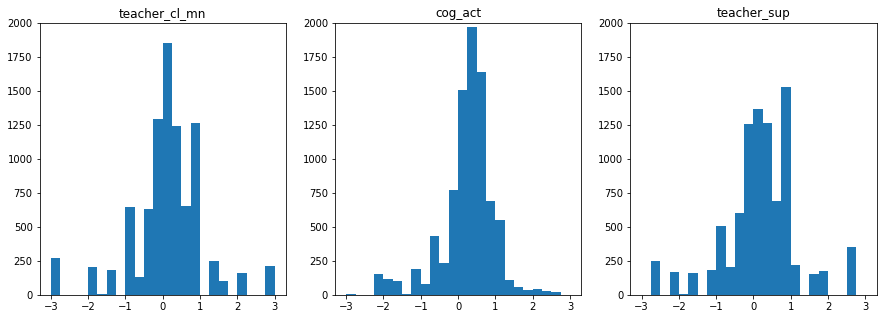

In [25]:
plt.figure(figsize=[15,5])
#plt.hist(data=df_select,x=list_attitudes[0],bins=20);
bin_edges=np.arange(-3,3.1,0.25)
for i in range(1,4,1) :
    plt.subplot(1,3,i)
    plt.hist(data=df_select,x=teaching_qual[i-1],bins=bin_edges)
    plt.title(teaching_qual[i-1])
    plt.ylim(0,2000)


All those three variables take only a limited number of values by construction. The cognitive activation variable seems to be almost normal and centered around its mean between 0 and 1. The two others seem to have two modes, one around 0 and another one around 1. 

Let's move on to the distribition of our main variable of interest: mathematical performance. 

(array([   0.,    0.,    0.,    0.,    0.,    4.,    8.,   21.,   70.,
         132.,  245.,  435.,  577.,  797.,  891.,  963., 1018.,  958.,
         873.,  707.,  539.,  394.,  245.,  133.,   53.,   13.,    5.,
           2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400,
        425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725,
        750, 775, 800, 825, 850, 875, 900, 925, 950, 975]),
 <a list of 35 Patch objects>)

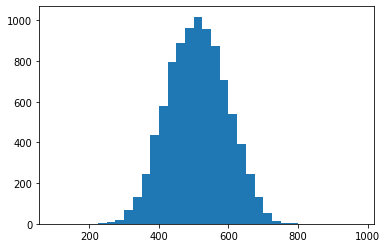

In [26]:
bin_edges=np.arange(100,1000,25)
plt.hist(data=df_select,x='math_perf',bins=bin_edges)

Its distribution is close to normal.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution is normal with no unusual points. I did not perform any transformations. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distributions of attitudes wether toward math or toward the math teacher are non unusual mainly due to their 'almost discrete' nature. I chose not to transform it. The distribution of ESCS is very left skewed, so i decided to perform a log transormation of it with a prior addition of a constant.   

## Bivariate Exploration


### Intercountry discrepancies

Let's start with investigating some inter country differences in terms of math performance, number of hours of mathematics study, the orientation of the programs. 

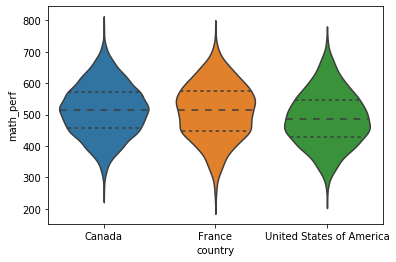

In [27]:
sb.violinplot(data=df_select,x='country',y='math_perf',inner='quartile')
    

In [28]:
df_select.groupby('country').describe()[['math_perf']]

math_perf                                    \
                             count        mean        std        min   
country                                                                
Canada                      6391.0  515.211026  82.275259  249.73516   
France                      1206.0  511.140589  88.081168  226.52284   
United States of America    1486.0  487.835396  85.667613  242.41314   

                                                                        
                                 25%        50%         75%        max  
country                                                                 
Canada                    455.997820  515.27498  572.877390  784.86528  
France                    447.877410  514.37919  576.148905  758.30346  
United States of America  428.189745  484.62377  547.678745  741.32260

The above graph and table shows that the median result for performance in mathematics is lower in the US compared to Canada and France. 

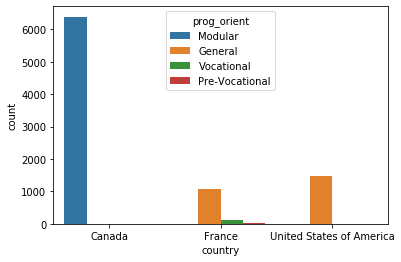

In [29]:
sb.countplot(data=df_select,x='country',hue='prog_orient')


The programs are only modular in Canada, onnly general in the US. Only France has a stratified educational system for 15 year old students.  

(0, 12)

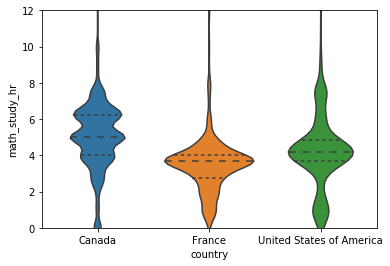

In [30]:
sb.violinplot(data=df_select,x='country',y='math_study_hr',inner='quartile')
plt.ylim(0,12)

The time spent studying math appears to be significantly different from one country to another. Canada has the highest median around 5 hours per week, France has the lowest median around 4 hours per week. 

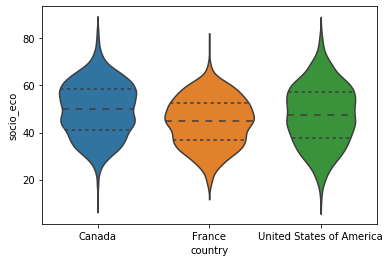

In [31]:
sb.violinplot(data=df_select,x='country',y='socio_eco',inner='quartile')

The median of the socio economic index is higher in Canada, then comes the one of the US and last France's. 

Let's have a look at potential variation in mathematic attitudes and teaching quality among the three countries of interest. 

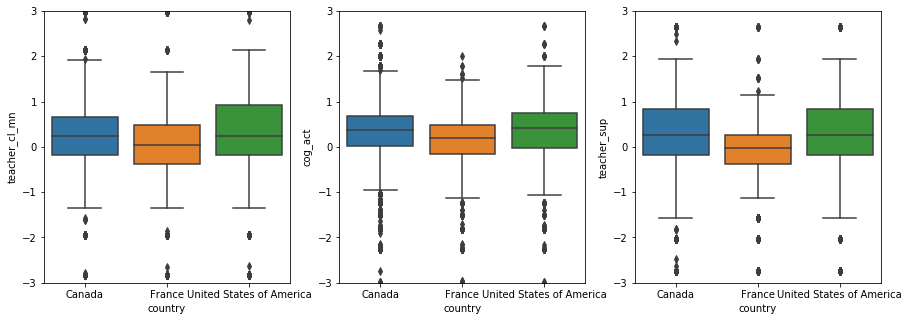

In [32]:
plt.figure(figsize=[15,5])
for i in range(1,4,1) :
    plt.subplot(1,3,i)
    sb.boxplot(data=df_select,x='country',y=teaching_qual[i-1])
    plt.ylim(-3,3)
    


As far as teaching quality is concerned, it appears that France's average results are below the one of the US and Canada. It's especially true for the support provided by math teachers with France's 75 percentile on the same level as Canada and US median. 

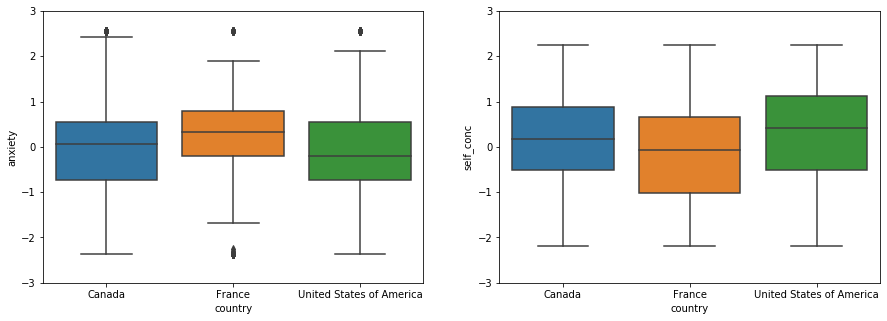

In [33]:
plt.figure(figsize=[15,5])
for i in range(1,3,1) :
    plt.subplot(1,2,i)
    sb.boxplot(data=df_select,x='country',y=math_attitudes[i-1])
    plt.ylim(-3,3)


And again despite better average results in mathematics, French students appear to suffer more from anxiety and display lower levels of mathematical self concept. 

### Investigating the potential link between math performance and our other variables of interest 

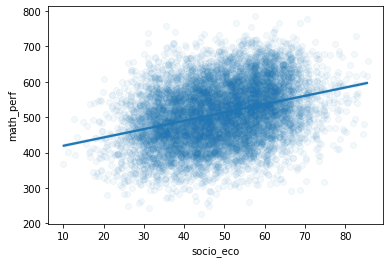

In [34]:
sb.regplot(data=df_select,x='socio_eco',y='math_perf',scatter_kws={'alpha':0.05},x_jitter=0.2)

The link between the socio economic status and the math performance appears quite strong. 

Let's move to plot the relationships between the teaching quality and the math performance.  

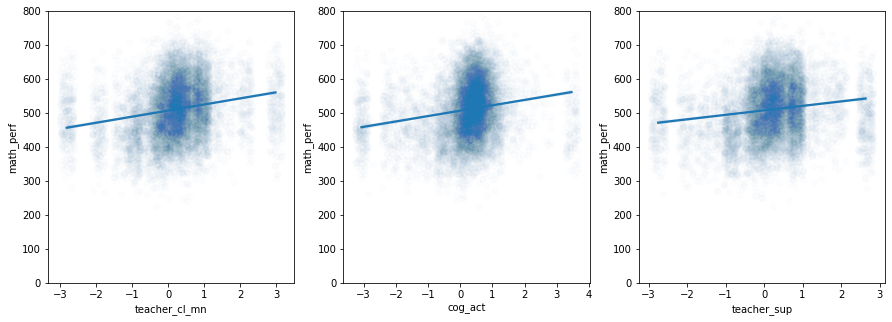

In [35]:
plt.figure(figsize=[15,5])
for i in range(1,4,1) :
    plt.subplot(1,3,i)
    sb.regplot(data=df_select,x=teaching_qual[i-1],y='math_perf',scatter_kws={'alpha':0.01},x_jitter=0.2)
    plt.ylim(0,800)

The three above plots appear to be less compelling. The linear regression line helps to capture the positive trends between each of the teaching quality variables and the performance in mathematics but all of the three relations appear to be quite weak. Let's move on to the relationships between anxiety/self-concept and mathematics performance.

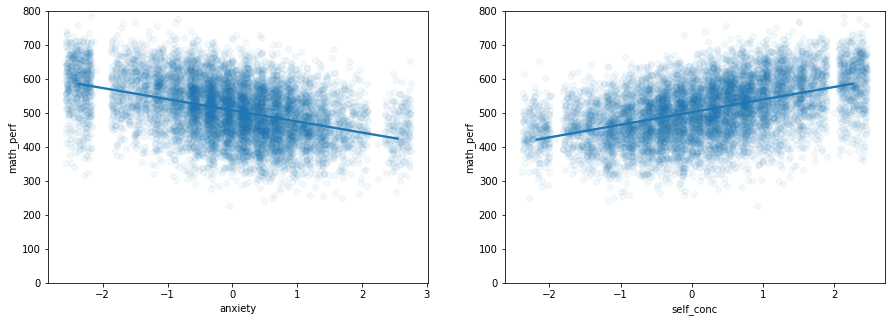

In [36]:
plt.figure(figsize=[15,5])
for i in range(1,3,1) :
    plt.subplot(1,2,i)
    sb.regplot(data=df_select,x=math_attitudes[i-1],y='math_perf',scatter_kws={'alpha':0.05},x_jitter=0.2)
    plt.ylim(0,800)

It's really interesting to note the strength of the association between math performance and math anxiety and math self concept (students' own assessment of their math skills). It may show that students are really good at evaluating their math skills. It may also show that anxiety and mathematics might be for certain students a vicious circle: bad results could bring anxiety that may then become an emotional hurdle for math learning.

Let's investigate potential relationships between anxiety/self-concept on one hand and the three variables capturing the teaching quality on the other. 



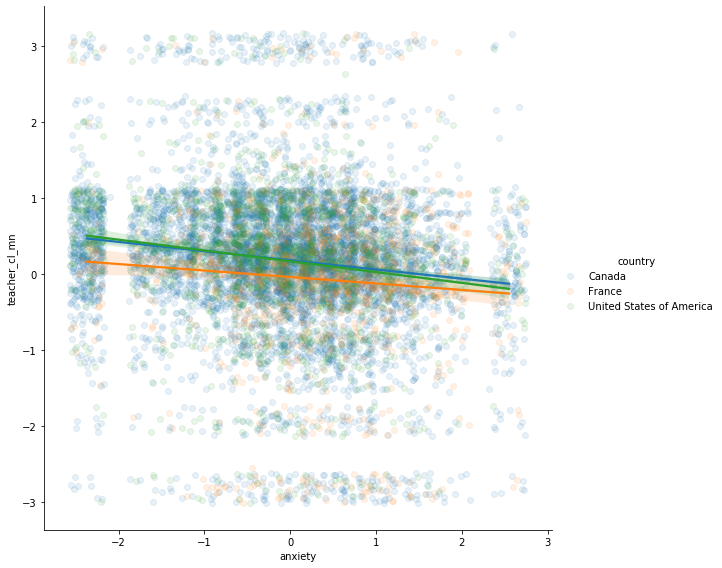

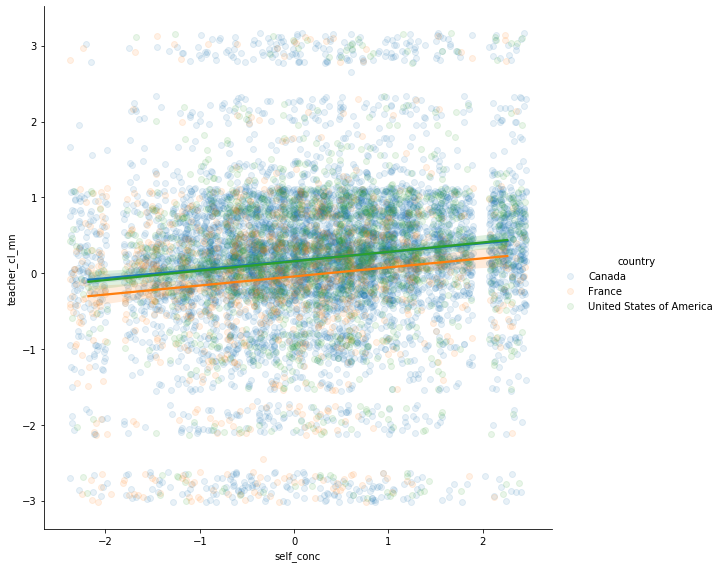

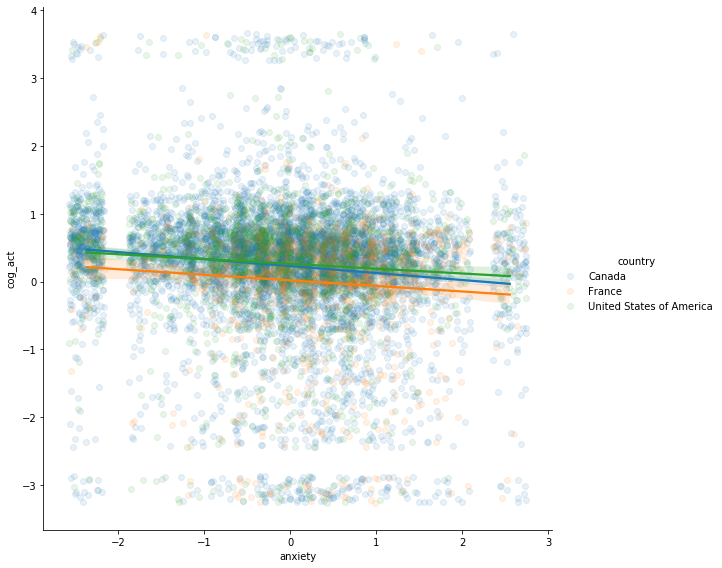

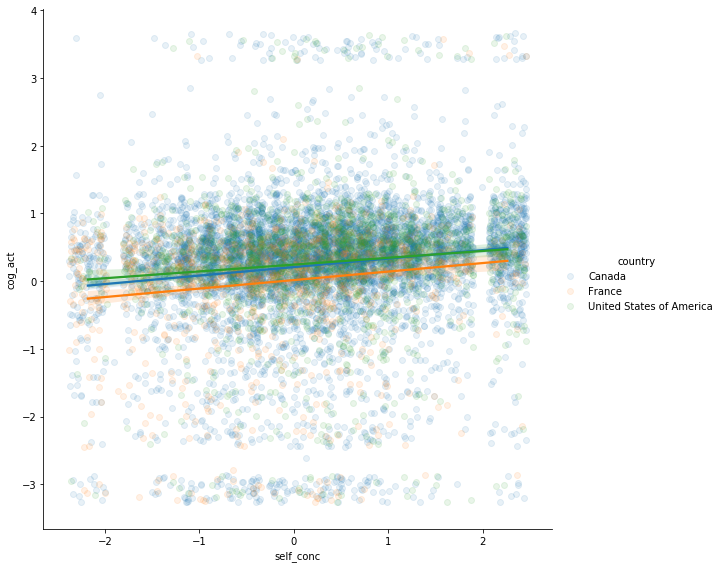

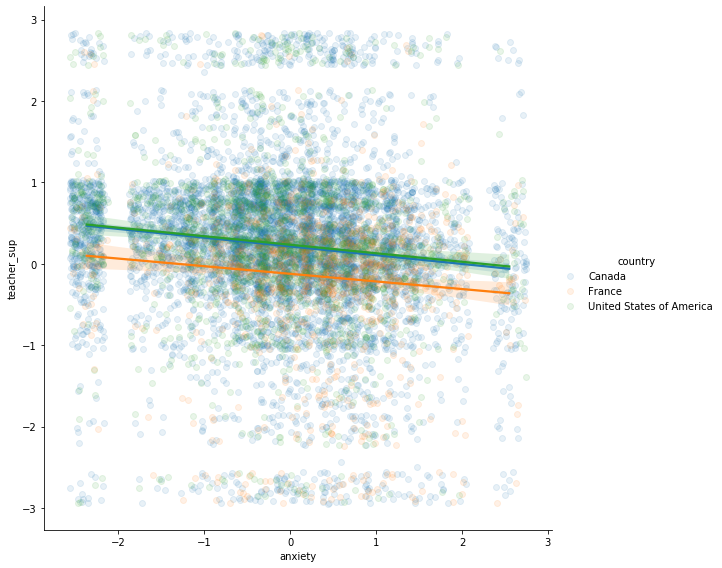

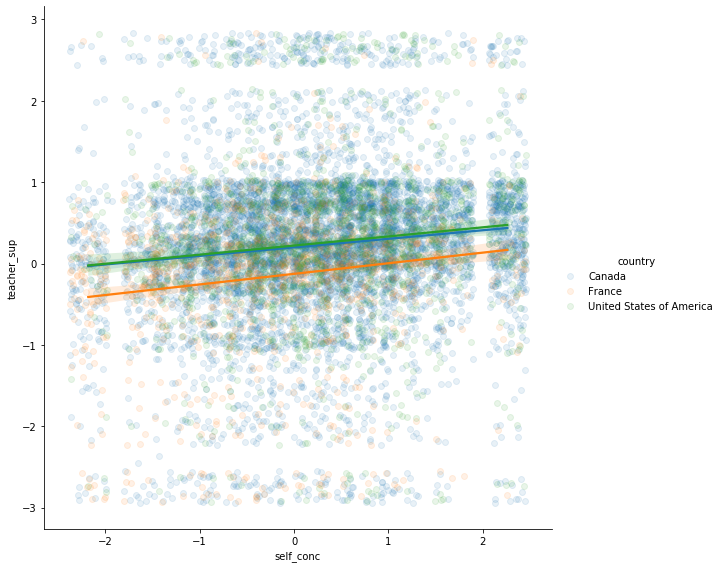

In [37]:
for j in range(1,4,1) :
    for i in range(1,3,1) :
        g=sb.FacetGrid(data=df_select, hue = 'country',height=8)
        g.map(sb.regplot,math_attitudes[i-1],teaching_qual[j-1],x_jitter=0.2, y_jitter=0.2, scatter_kws={'alpha':0.1})   
        g.add_legend()
    
    


All teaching quality variables appear to have a positive but weak association with mathematical self-concept and a negative one with anxiety. 

Let's investigate the relationship with the interaction between math performance and the international grade. 

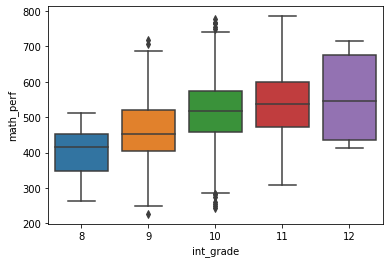

In [38]:
sb.boxplot(data=df_select,x='int_grade',y='math_perf')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

First this investigation enabled me to uncover strong national specifities in mathematic performance. The performance of US students is significantly lower on average than the one of Canadian or French students. 

Then we identified the main features that vary with math performance: first two variables that are positively associated: the socio economic index and the mathematical self concept and then mathematical anxiety with displays a high negative correlation with math performance. The variables linked to quality of math teaching: class management, support from the teacher, cognitive activation display also a positive correlation with mathematical performance through these effects appear to be weaker. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Among those main features that seem to be linked to math performance, we have been able to note some important national discrepancies. Anxiety appears to be more widespread in France than in Canada and the US and mathematical self-concept is similarly higher in the two North American countries. 

As far as the teaching quality is concerned, it appears that France's median results are below the ones of the US and Canada. It's especially true for the support provided by math teachers with France's 75 percentile on the same level as Canada and US median. 


## Multivariate Exploration

Let's start with the correlation table of all our variables. 

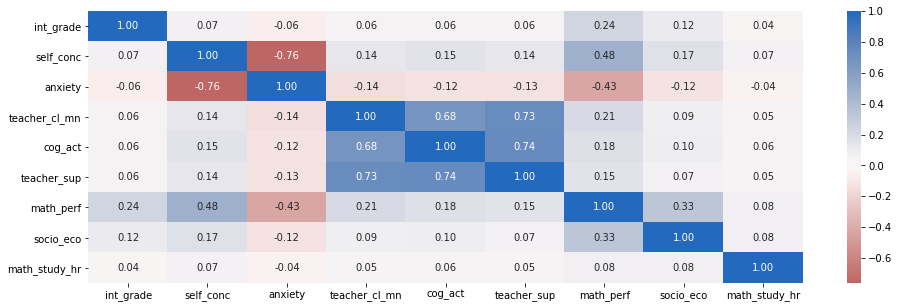

In [39]:
plt.figure(figsize = (16,5))
sb.heatmap(df_select.corr(),annot=True,fmt='.2f',cmap='vlag_r',center=0)

Several observations:    

- This matrix of correlation confirms what we observed in the last part of our investigation work. Mathematical performance, our main variable of interest displays moderate correlation levels first with our two variables describing students's attitude toward mathematics (between 0.4 and 0.5). Then the socio economic level of parents is the third variable that shows moderate correlation with math performance (correlation coefficient equals 0.33). Last some weak correlations with math performance could be reported: international grade of the students, all variables characterizing the quality of mathematical teaching, and to a lower extent the number of hours spent studying math at school. 

- The two variables capturing students' attitude toward mathematics are strongly negatively correlated (-0.76). All the three variables capturing the quality of teaching are also strongly correlated. 

- Last the table of correlations shows that the teaching quality variables are only weakly correlated with anxiety and self-concept (around 0.15). 

Let's try to investigate at a deeper level the interactions described above between our variables of interest in a cross country perspective. 

We would like first to assess whether the correlation of socio economic status of parents and math performance varies accross our three countries of interest. 

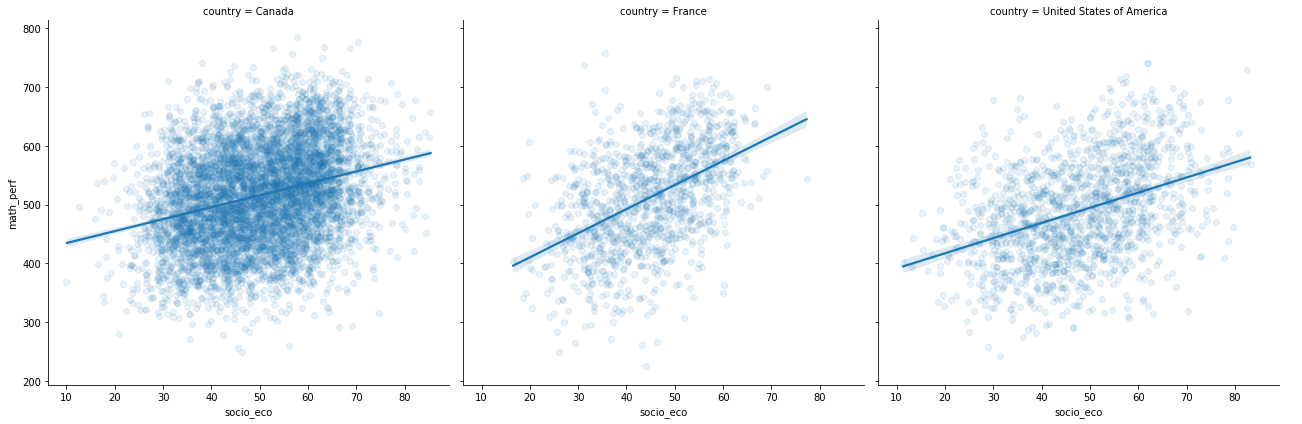

In [40]:
g=sb.FacetGrid(data=df_select,col='country',height=6)
g.map(sb.regplot,'socio_eco','math_perf',x_jitter=0.2,y_jitter=0.2,scatter_kws={'alpha':0.1})   
g.add_legend()


Those three plots show something very interesting. While the relationships between the socio economic status of parents and mathematical performance is positive in each country, it appears that the slope of French graph appears to be much steeper than the slopes of the graph for the two other countries. It may mean that the French school system is less efficient to overturn social discrepancies. 

Let's investigate the relationship between the grades student's are enrolled in and mathematical performance 

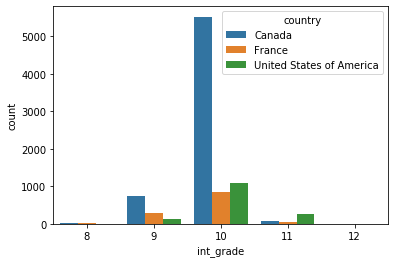

In [41]:
sb.countplot(data=df_select,x='int_grade',hue='country')

From the above graph, we see that the majority of students were enrolled in a national grade that have been assessed as equivalent to the 10th international grade. The relative repartition of students in the 9th, 10th and 11th grade appear to be very country specific.

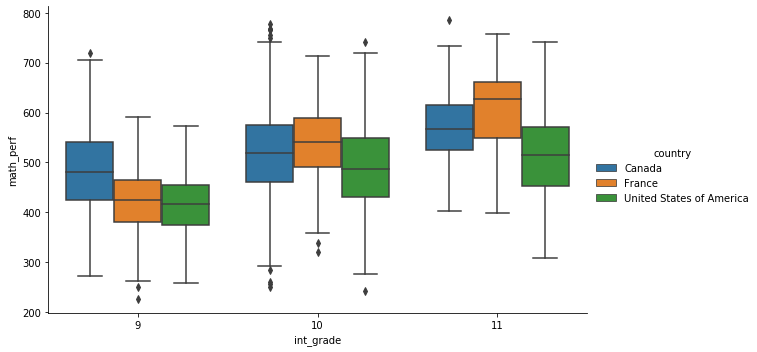

In [42]:
#g=sb.FacetGrid(data=df_select[df_select.int_grade.isin([9,10,11])],col='country',height=6)
#g.map(sb.boxplot,'int_grade','math_perf')  
#plt.ylim(0,800)

g = sb.catplot(x="int_grade", y="math_perf",
                hue="country",
                data=df_select[df_select.int_grade.isin([9,10,11])], kind="box",
                height=5, aspect=1.7);

The dynamics of math performance according to the grade students' are enrolled in appear to be very different from one country to another. The relative math performance of French students appear to be very "grade" specific compared to the performance of their American or Canadian counterparts. But being in one grade or another is the results of different rules and there may be some selection effects. For example, the policy to allow, encourage or make a student repear a class may differ.  

Let's now move to the different interactions of mathematical anxiety and self-concept on math performance in our three countries of interest. We will first draw the plots of anxiety and math performance per country and also the ones for self-concept and math performance.

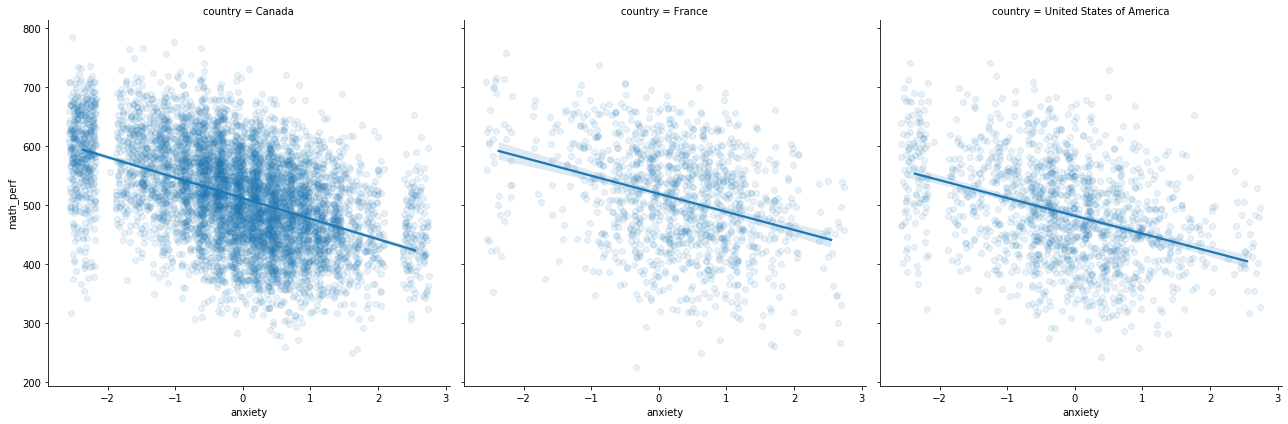

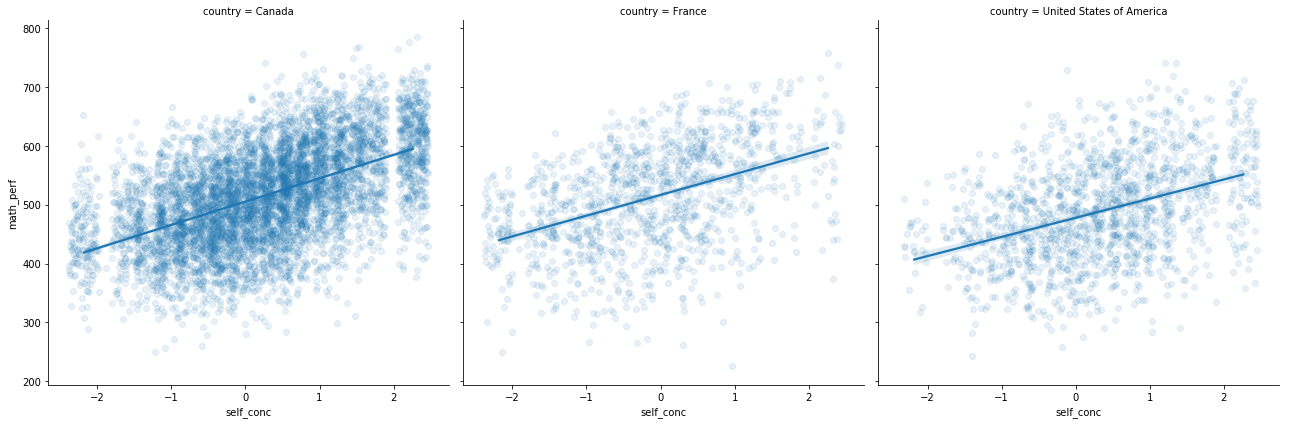

In [43]:
g=sb.FacetGrid(data=df_select,col='country',height=6)
g.map(sb.regplot,'anxiety','math_perf',x_jitter=0.2,y_jitter=0.2,scatter_kws={'alpha':0.1})   
plt.show()

g=sb.FacetGrid(data=df_select,col='country',height=6)
g.map(sb.regplot,'self_conc','math_perf',x_jitter=0.2,y_jitter=0.2,scatter_kws={'alpha':0.1})   
g.add_legend()

It seems that the slopes of association between anxiety and performance in maths are similar accross the different countries and the observation is the same for self-concept and math performance. 


To have a more detailed view, we'll plot them on the same graph to be able to compare more precisely the three slopes. 

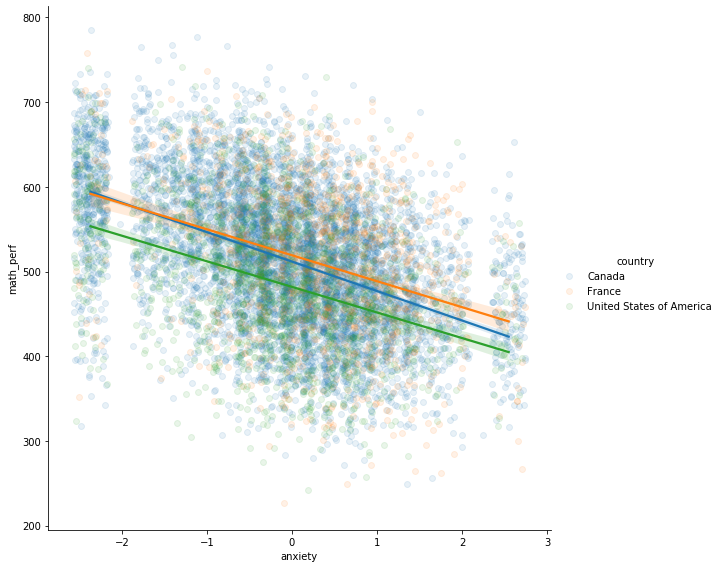

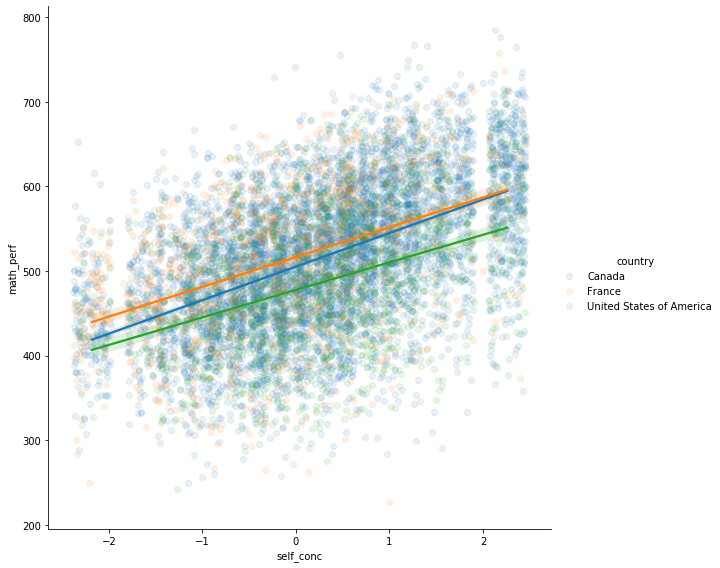

In [44]:
for i in range(1,3,1) :
    g=sb.FacetGrid(data=df_select,hue='country',height=8)
    #plt.title('ESCS')
    g.map(sb.regplot,math_attitudes[i-1],'math_perf',x_jitter=0.2, scatter_kws={'alpha':0.1})   
    g.add_legend()

The two above scatter plots with the drawn regression lines show that the regression lines, which depict the association between anxiety/math self-confidence and math performance are really similar accross the three countries with the slopes in Canadian context a little bit steeper than in the two other coutries.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We have been able to uncover some interesting insights from a cross country perspective. Namely being French seems to reinforce the slope of the  association between math performance and socio economix index. It may mean that France performs worse than US and Canada to reduce social inequalities through education. 

We have also been able to see in this dataset the uneven progression of students from one grade to another in the three different countries. The US and Canada display a rather flatter progression of their students' math performance from one grade to another compared to France. 
 
### Were there any interesting or surprising interactions between features?

Anxiety and mathematic performance appear to be strongly negatively correlated. Despite strong national differences both in math performance and anxiety, we surprisingly found that the relationship between anxiety and math performance appears to be similar accross the three countries. French students appear to suffer on average more badly from mathematical anxiety than North American students despite performing better on average in mathematics. This shows the cultural and social component of mathematical anxiety. This needs to be investigated more in depth through statistical analysis.
